In [52]:
import math
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

summer_refractive_index = 1+0.00020409512542851616
winter_refractive_index = 1+0.00020953240736654166
#

In [44]:
print(summer_refractive_index)
print(winter_refractive_index)

1.0002040951254285
1.0002095324073665


In [45]:
def cherenkov_angle(muon_energy_eV, refractive_index=1.000293):
    # Constants
    c = 299792458  # speed of light in m/s
    muon_rest_mass_MeV = 105.66  # rest mass of muon in MeV
    eV_to_MeV = 1e-6  # conversion factor from eV to MeV
    
    # Convert muon energy from eV to MeV
    muon_energy_MeV = muon_energy_eV * eV_to_MeV
    
    # Check if the energy is sufficient for Cherenkov radiation
    if muon_energy_MeV <= muon_rest_mass_MeV:
        return "Energy too low for Cherenkov radiation."
    
    # Calculate the momentum p
    p = math.sqrt((muon_energy_MeV)**2 - (muon_rest_mass_MeV)**2)
    
    # Calculate beta
    beta = p / muon_energy_MeV
    
    # Check if Cherenkov condition is met
    if beta * refractive_index <= 1:
        return "Muon velocity too low for Cherenkov radiation in this medium."
    
    # Calculate Cherenkov angle
    cos_theta_C = 1 / (beta * refractive_index)
    theta_C = math.acos(cos_theta_C)
    
    # Convert angle from radians to degrees
    theta_C_degrees = math.degrees(theta_C)
    
    return theta_C_degrees

# Example usage
muon_energy_eV = 6e9  # example energy in eV
angle = cherenkov_angle(muon_energy_eV)
print(f"Cherenkov angle: {angle}")

Cherenkov angle: 0.9514227716137922


In [46]:
def plot_cherenkov_angle_distribution(min_energy_eV, max_energy_eV, num_points, refractive_index=1.000293, plot_option=False):
    energies_eV = np.logspace(np.log10(min_energy_eV), np.log10(max_energy_eV), num_points)
    energies_GeV = energies_eV * 1e-9  # Convert eV to GeV
    angles = []

    for energy in energies_eV:
        angle = cherenkov_angle(energy, refractive_index)
        if angle is not None:
            angles.append(angle)
        else:
            angles.append(0)  # Append 0 for energies not producing Cherenkov radiation
    if plot_option:
        plt.figure(figsize=(10, 6))
        plt.plot(energies_GeV, angles, label='Cherenkov Angle')
        plt.xscale('log')
        plt.xlabel('Muon Energy (GeV)')
        plt.ylabel('Cherenkov Angle (degrees)')
        plt.title('Cherenkov Angle Distribution as a Function of Muon Energy')
        plt.legend()
        plt.grid(True, which="both", ls="--")
        plt.show()
    
    return energies_GeV, angles

# Example usage
min_energy_eV = 6e9  # 1 GeV
max_energy_eV = 1e12  # 1 TeV
num_points = 1000

energies, summer_angles = plot_cherenkov_angle_distribution(min_energy_eV, max_energy_eV, num_points,refractive_index=summer_refractive_index)
energies, winter_angles = plot_cherenkov_angle_distribution(min_energy_eV, max_energy_eV, num_points,refractive_index=winter_refractive_index)

Maximum angle value for the summer = 1.157 degrees
Maximum angle value for the winter = 1.173 degrees


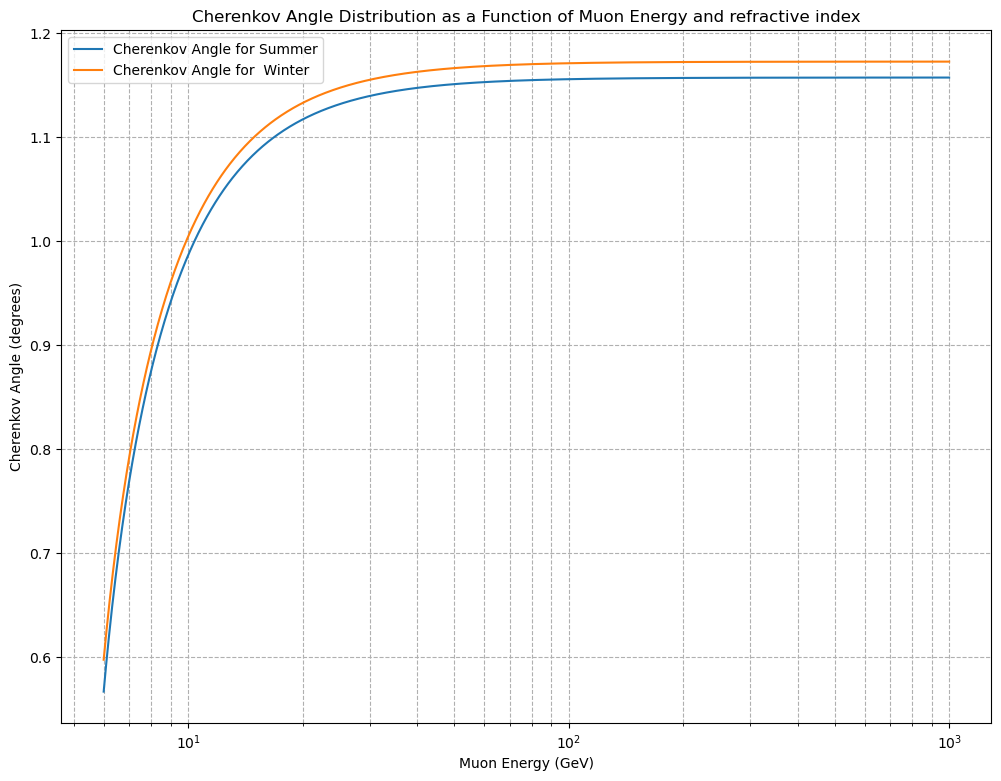

In [72]:
print(f"Maximum angle value for the summer = {round(max(summer_angles),3)} degrees")
print(f"Maximum angle value for the winter = {round(max(winter_angles),3)} degrees")
plt.figure(figsize=(12, 9))
plt.plot(energies, summer_angles, label='Cherenkov Angle for Summer')
plt.plot(energies, winter_angles, label='Cherenkov Angle for  Winter')
plt.xscale('log')
plt.xlabel('Muon Energy (GeV)')
plt.ylabel('Cherenkov Angle (degrees)')
plt.title('Cherenkov Angle Distribution as a Function of Muon Energy and refractive index')
plt.legend()
plt.grid(True, which="both", ls="--")
#plt.show()
#plt.savefig('/Users/vdk/muons2024/images/PlanPaper/Cherenkov_Angle_Distribution.pdf', dpi=200, format='pdf', bbox_inches='tight')

In [48]:
max(winter_angles)

1.172788054430148

In [49]:
max(summer_angles)

1.1574735569264523

In [2]:
def calculate_flux_for_energy_bins(energy_bins, k=100):
    """
    Calculate the muon flux for specified energy bins.

    :param energy_bins: List of tuples representing the energy bins [(E1, E2), ...] in GeV.
    :param k: Normalization constant (default is 100 muons/m²/s/sr).
    :return: List of flux values for each energy bin.
    """
    flux_values = []
    
    for E1, E2 in energy_bins:
        if E2 == float('inf'):
            # For thxe last bin extending to infinity
            flux = k / E1
        else:
            flux = k * (1/E1 - 1/E2)
        
        flux_values.append(flux)
    
    return flux_values

# Example usage:
energy_bins = [(1, 10), (10, 100), (100, 1000), (1000, float('inf'))]  # Energy bins in GeV
flux_values = calculate_flux_for_energy_bins(energy_bins)

for bin_range, flux in zip(energy_bins, flux_values):
    print(f"Flux for energy bin {bin_range} GeV: {flux} muons/m²/s/sr")

Flux for energy bin (1, 10) GeV: 90.0 muons/m²/s/sr
Flux for energy bin (10, 100) GeV: 9.000000000000002 muons/m²/s/sr
Flux for energy bin (100, 1000) GeV: 0.9000000000000001 muons/m²/s/sr
Flux for energy bin (1000, inf) GeV: 0.1 muons/m²/s/sr


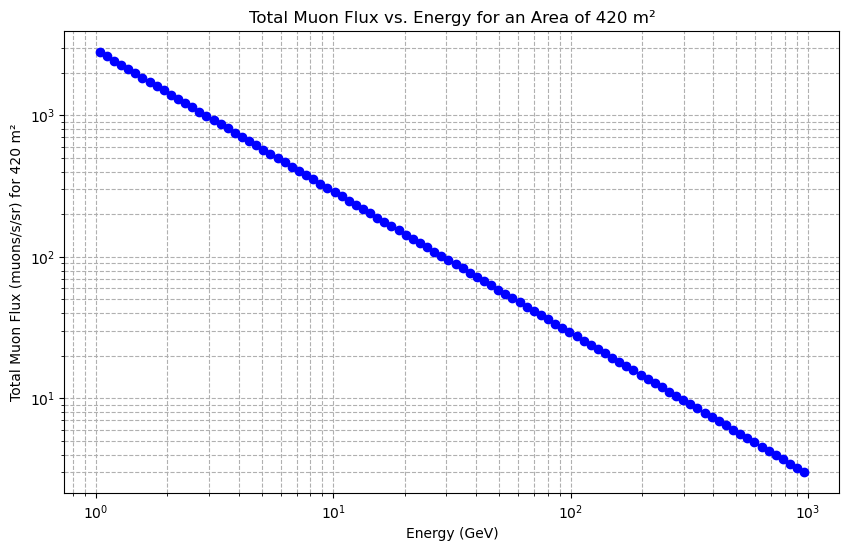

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_flux_for_energy_bins(energy_bins, k=100):
    flux_values = []
    
    for E1, E2 in energy_bins:
        if E2 == float('inf'):
            flux = k / E1
        else:
            flux = k * (1/E1 - 1/E2)
        flux_values.append(flux)
    
    return flux_values

# Define 100 energy bins from 1 GeV to 1 TeV (1000 GeV) logarithmically spaced
energy_edges = np.logspace(0, 3, 101)  # from 10^0 to 10^3 GeV
energy_bins = [(energy_edges[i], energy_edges[i+1]) for i in range(len(energy_edges) - 1)]

# Calculate the flux for these energy bins
flux_values = calculate_flux_for_energy_bins(energy_bins)

# Define the area in square meters
area_m2 = 420

# Calculate the total flux for the given area
total_flux_values = [flux * area_m2 for flux in flux_values]

# Extracting midpoints of bins for plotting
bin_midpoints = [(E1 + E2) / 2 for E1, E2 in energy_bins]

# Plotting the total flux
plt.figure(figsize=(10, 6))
plt.plot(bin_midpoints, total_flux_values, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Total Muon Flux (muons/s/sr) for 420 m²')
plt.title('Total Muon Flux vs. Energy for an Area of 420 m²')
plt.grid(True, which="both", ls="--")
plt.show()

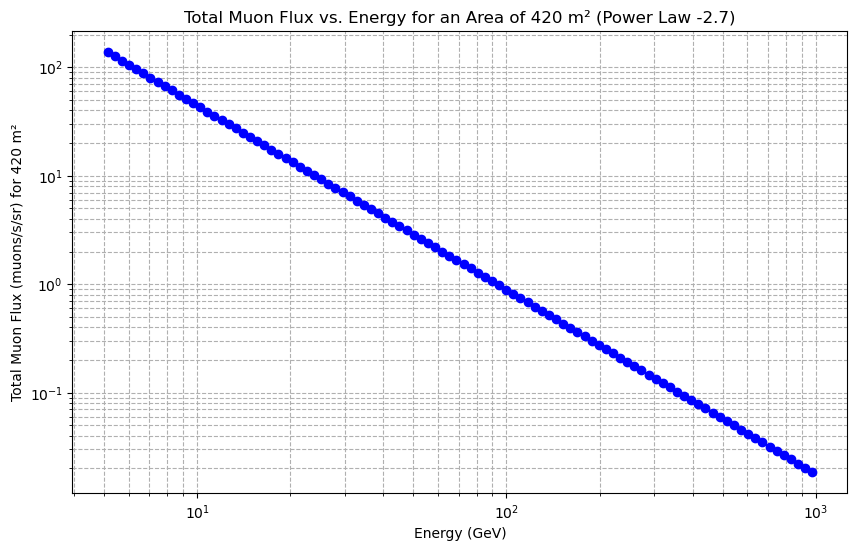

In [5]:
def calculate_flux_for_energy_bins(energy_bins, k=100, gamma=2.7):
    flux_values = []
    
    for E1, E2 in energy_bins:
        if E2 == float('inf'):
            flux = k * E1**(-gamma) / (gamma - 1)
        else:
            flux = k * (E1**(1-gamma) - E2**(1-gamma)) / (gamma - 1)
        flux_values.append(flux)
    
    return flux_values

# Define 100 energy bins from 5 GeV to 1 TeV (1000 GeV) logarithmically spaced
energy_edges = np.logspace(np.log10(5), 3, 101)  # from 10^0.7 to 10^3 GeV
energy_bins = [(energy_edges[i], energy_edges[i+1]) for i in range(len(energy_edges) - 1)]

# Calculate the flux for these energy bins with gamma = 2.7
gamma = 2.7
flux_values = calculate_flux_for_energy_bins(energy_bins, gamma=gamma)

# Define the area in square meters
area_m2 = 420

# Calculate the total flux for the given area
total_flux_values = [flux * area_m2 for flux in flux_values]

# Extracting midpoints of bins for plotting
bin_midpoints = [(E1 + E2) / 2 for E1, E2 in energy_bins]

# Plotting the total flux
plt.figure(figsize=(10, 6))
plt.plot(bin_midpoints, total_flux_values, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Total Muon Flux (muons/s/sr) for 420 m²')
plt.title('Total Muon Flux vs. Energy for an Area of 420 m² (Power Law -2.7)')
plt.grid(True, which="both", ls="--")
plt.show()

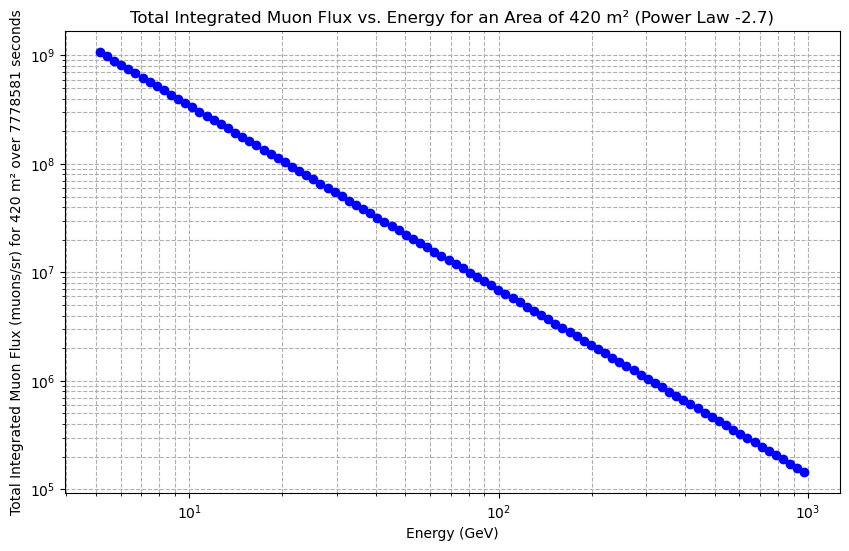

In [6]:
# Define the integration time in seconds
integration_time_s = 7778581

# Calculate the total flux for the given area and integration time
total_flux_integrated_values = [flux * area_m2 * integration_time_s for flux in flux_values]

# Plotting the total flux integrated over the given time
plt.figure(figsize=(10, 6))
plt.plot(bin_midpoints, total_flux_integrated_values, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Total Integrated Muon Flux (muons/sr) for 420 m² over 7778581 seconds')
plt.title('Total Integrated Muon Flux vs. Energy for an Area of 420 m² (Power Law -2.7)')
plt.grid(True, which="both", ls="--")
plt.show()

In [14]:
len(np_array)

567

## Calculate outlier values

1489
2.242399999999998


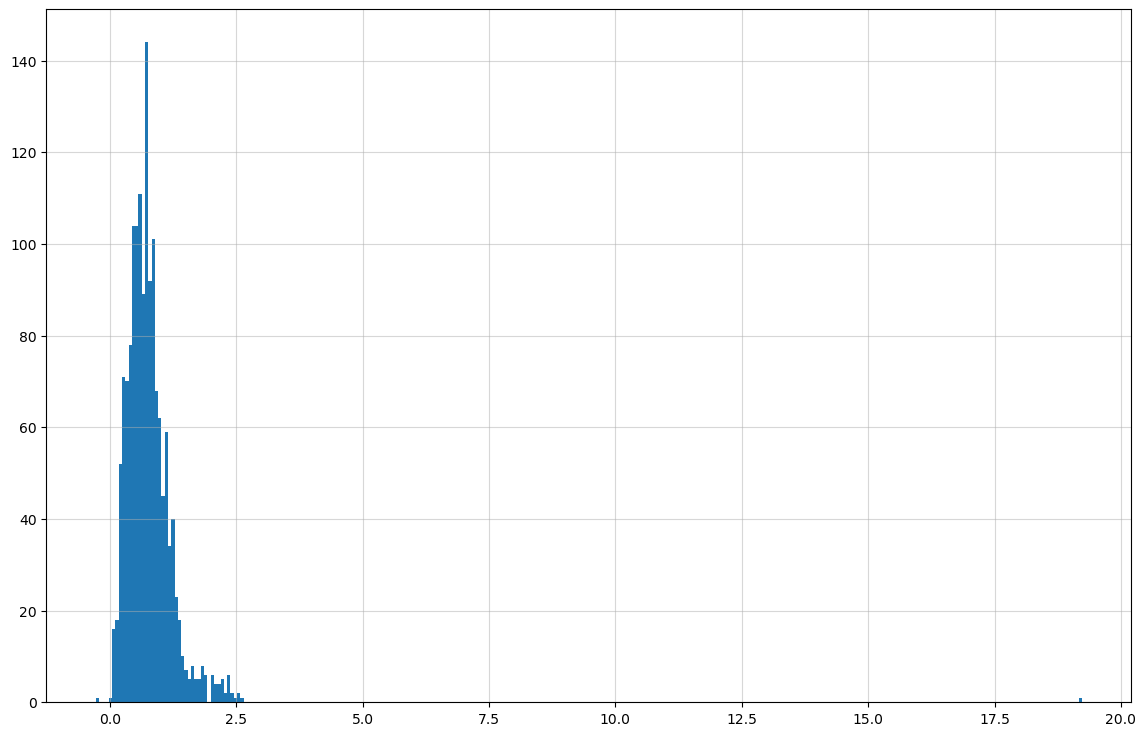

In [71]:
np_array = np.load('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/array_2023.npy')
plt.figure(figsize=(14, 9))
z,x,c = plt.hist(np_array,bins = 300)
plt.grid(alpha=0.5)
print(len(np_array))
print(np.quantile(np_array,0.99))

In [62]:
np_array

array([0.70613371, 0.68302268, 0.56767822, 0.92901249, 0.59491539,
       0.77888235, 0.8019026 , 0.77133523, 0.705938  , 0.85618068,
       1.20670535])

520


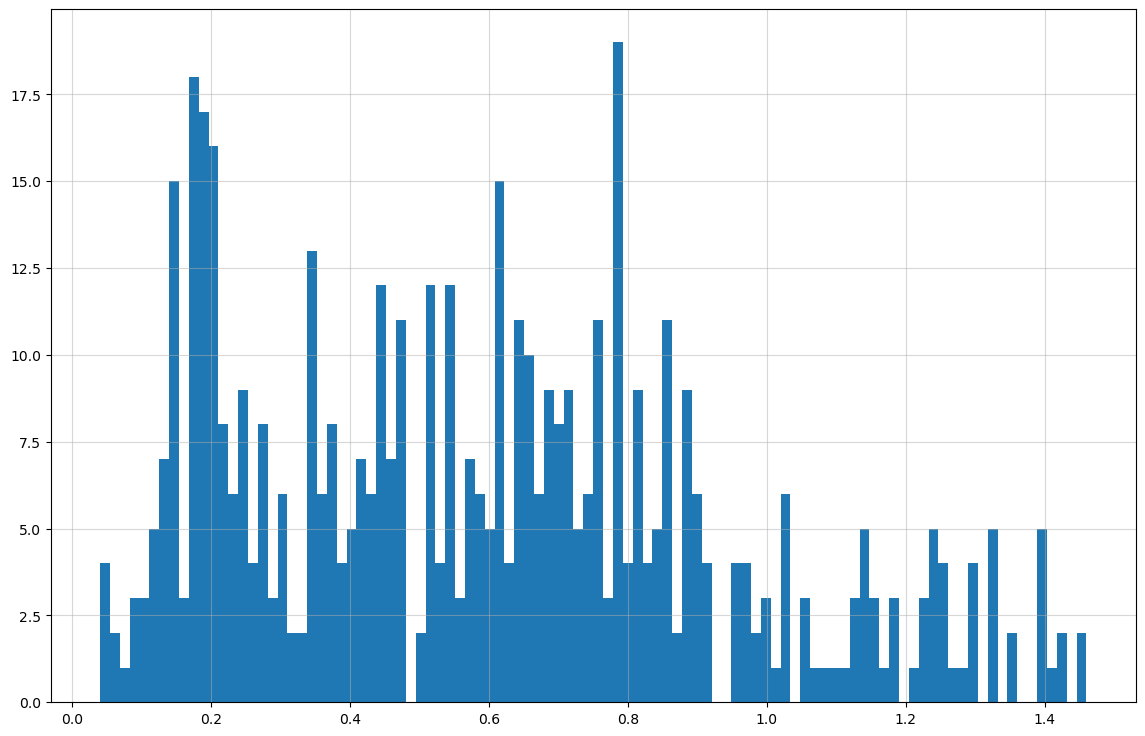

In [36]:
np_array = np.load('/Users/vdk/muons2024/array_no_outliers.npy')
plt.figure(figsize=(14, 9))
z,x,c = plt.hist(np_array,bins = 100)
plt.grid(alpha=0.5)
print(len(np_array))

538


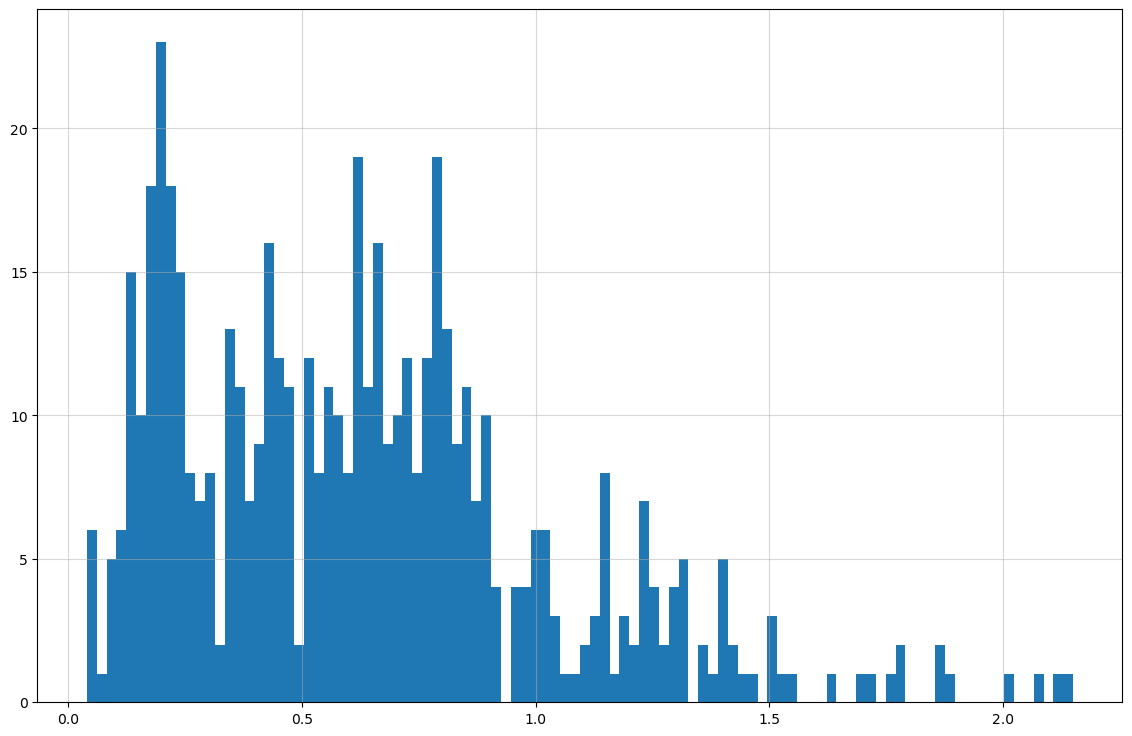

In [37]:
np_array = np.load('/Users/vdk/muons2024/95percent_arra-No_outliers.npy')
plt.figure(figsize=(14, 9))
z,x,c = plt.hist(np_array,bins = 100)
plt.grid(alpha=0.5)
print(len(np_array))

In [56]:
file_path = '/Users/vdk/muons2024/lapalma_simulations/nsb_play/nsb_tuned_7.txt'  # Replace with your actual file path
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['id', 'nsb', 'time'])

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_3896/2834369205.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['id', 'nsb', 'time'])


In [58]:
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['id', 'nsb', 'time'])
nsb_threshold = 2.2
filtered_df = df[df['nsb'] > nsb_threshold]
weighted_sum = (filtered_df['nsb'] * filtered_df['time']).sum()
total_duration = filtered_df['time'].sum()
weighted_average = weighted_sum / total_duration

In [59]:
weighted_average

1.3567010588562143